# clustering

## problem definition
- find the clusters using hierarchical clustering

### pre-requisites

In [1]:
import warnings
warnings.filterwarnings(action="ignore")

### import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### pre-processing

In [4]:
# remove unwanted columns
df.drop(['CustomerID', 'Gender', 'Age'], axis=1, inplace=True)

In [5]:
# rename the columns
df.rename({
    "Annual Income (k$)": "Income", 
    "Spending Score (1-100)": "SpendingScore"
}, axis=1, inplace=True)

In [6]:
df.head()

,Income,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### clustering 

In [26]:
from sklearn.cluster import AgglomerativeClustering

# create an object 
agglomerative = AgglomerativeClustering(n_clusters=5)

# fit the data
agglomerative.fit(df)

AgglomerativeClustering(n_clusters=5)

In [27]:
agglomerative.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### result visualization

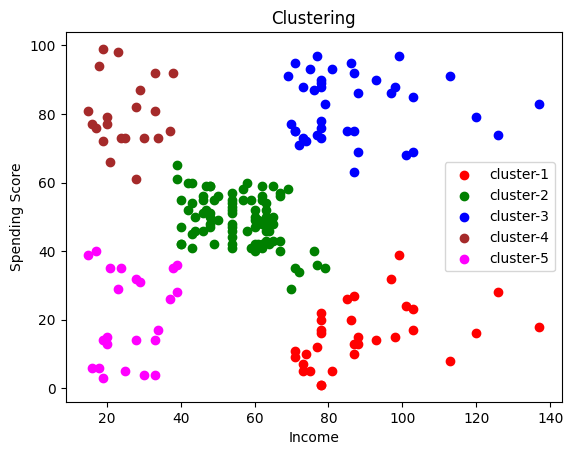

In [28]:
colors = ["red", "green", "blue", "brown", "magenta"]

for cluster_index in range(5):
    plt.scatter(df['Income'][agglomerative.labels_ == cluster_index],
                df['SpendingScore'][agglomerative.labels_ == cluster_index],
               color=colors[cluster_index], label=f"cluster-{cluster_index + 1}")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Clustering")
plt.legend()

### dendrogram visualization

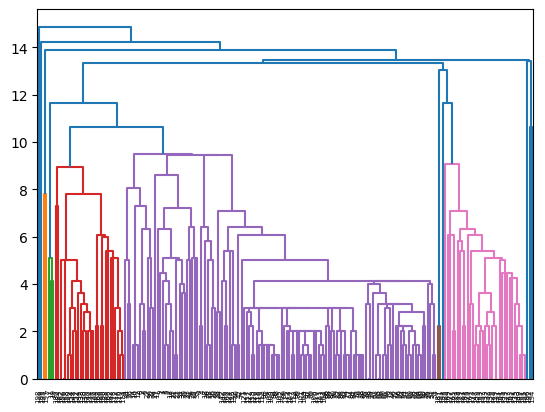

In [15]:
from scipy.cluster import hierarchy

# create linkage
linkage = hierarchy.linkage(df, method='single')

# render a dendrogram
dendrogram = hierarchy.dendrogram(linkage, orientation='top')

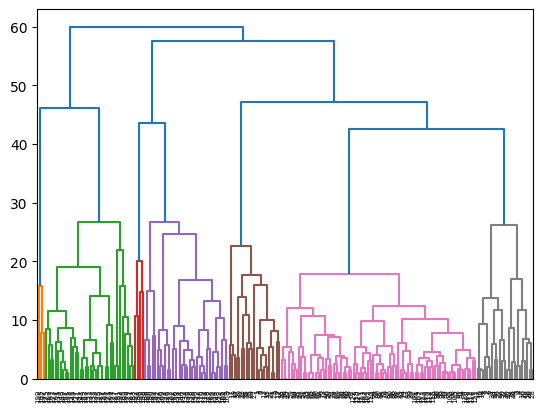

In [16]:
from scipy.cluster import hierarchy

# create linkage
linkage = hierarchy.linkage(df, method='average')

# render a dendrogram
dendrogram = hierarchy.dendrogram(linkage, orientation='top')

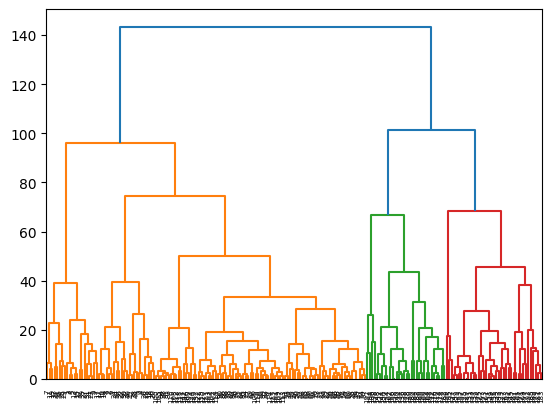

In [17]:
from scipy.cluster import hierarchy

# create linkage
linkage = hierarchy.linkage(df, method='complete')

# render a dendrogram
dendrogram = hierarchy.dendrogram(linkage, orientation='top')

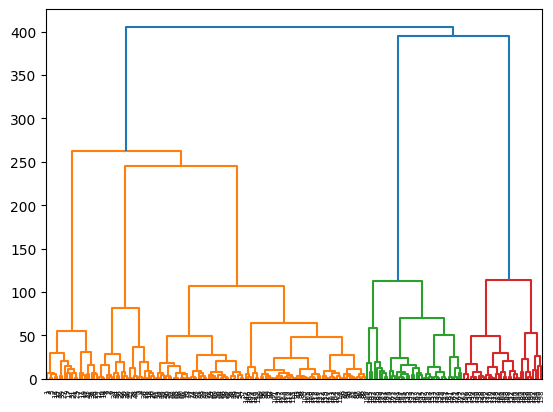

In [19]:
from scipy.cluster import hierarchy

# create linkage
linkage = hierarchy.linkage(df, method='ward')

# render a dendrogram
dendrogram = hierarchy.dendrogram(linkage, orientation='top')

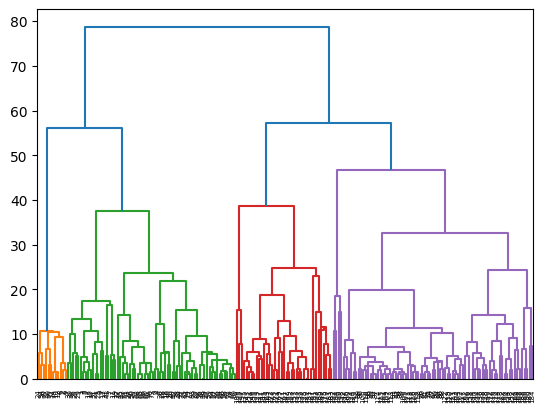

In [20]:
from scipy.cluster import hierarchy

# create linkage
linkage = hierarchy.linkage(df, method='median')

# render a dendrogram
dendrogram = hierarchy.dendrogram(linkage, orientation='top')

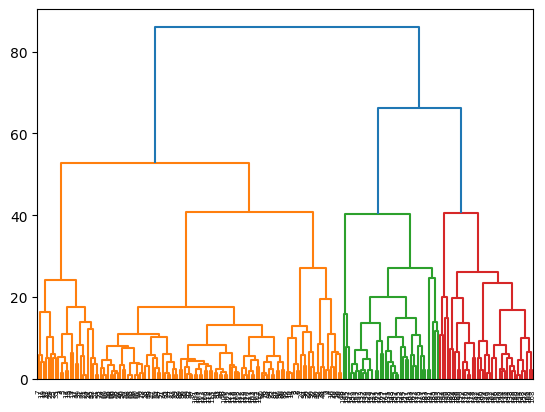

In [21]:
from scipy.cluster import hierarchy

# create linkage
linkage = hierarchy.linkage(df, method='weighted')

# render a dendrogram
dendrogram = hierarchy.dendrogram(linkage, orientation='top')

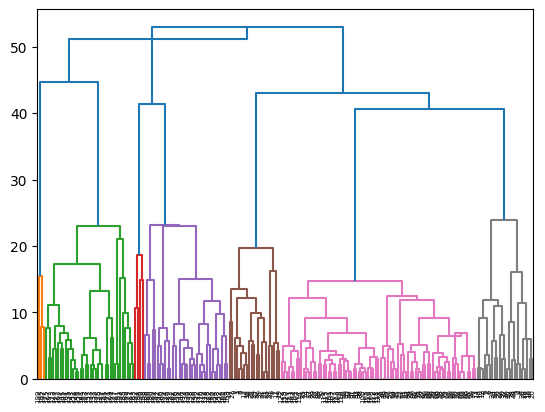

In [22]:
from scipy.cluster import hierarchy

# create linkage
linkage = hierarchy.linkage(df, method='centroid')

# render a dendrogram
dendrogram = hierarchy.dendrogram(linkage, orientation='top')

### make the data labelled

In [30]:
# add a new column with category
cateogories = ["low income, low spending", "mid income, mid spending", 
               "high income, high spending", "high income, low spending", 
               "low income, high spending"]
df['category'] = agglomerative.labels_

In [31]:
df.head()

,Income,SpendingScore,category
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [32]:
# split the data into x and y 
x = df.drop('category', axis=1)
y = df['category']

In [33]:
# split the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
y_true = y_test

accuracy = accuracy_score(y_true, y_pred)
accuracy

0.9833333333333333